<a href="https://colab.research.google.com/github/shadiyahamza/assignment/blob/main/UnsupervisedLearning_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Libraries

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Dataset From Drive

In [ ]:
# #mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Loading Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers (2).csv


In [ ]:
df_mall = pd.read_csv('/content/Mall_Customers.csv')
df_mall.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Preprocessing

In [ ]:
df_mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df_mall.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
# for simplicity,we are considering only 2 columns
# 'Annual Income  (k$)' and 'Spending Score (1-100)'
X = df_mall.iloc[:, [3, 4]].values

k-means

In [ ]:
WCSS=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++')
  kmeans.fit(X)
  WCSS.append(kmeans.inertia_)

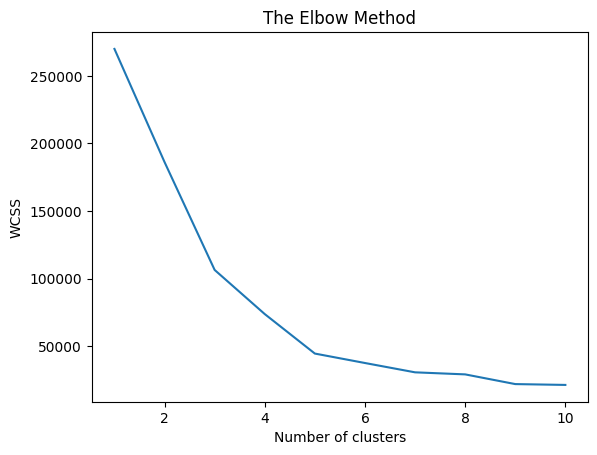

In [ ]:
plt.plot(range(1,11),WCSS)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# from the elbow plot, we can fix value of k as 5
# building the Kmeans clustering model
kmeans=KMeans(n_clusters=5,init='k-means++')
# max_iter can be set if we need to fix the number of iterations
y_kmeans=kmeans.fit_predict(X) # Output generation

In [ ]:
df_mall['Cluster']=y_kmeans
df_mall.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,2
2,3,Female,20,16,6,3
3,4,Female,23,16,77,2
4,5,Female,31,17,40,3


### Visual Representation of Clusters

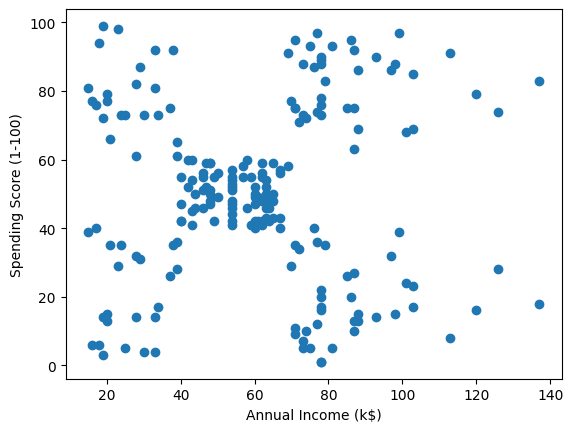

In [ ]:
# Before clustering
plt.scatter(df_mall['Annual Income (k$)'],df_mall['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

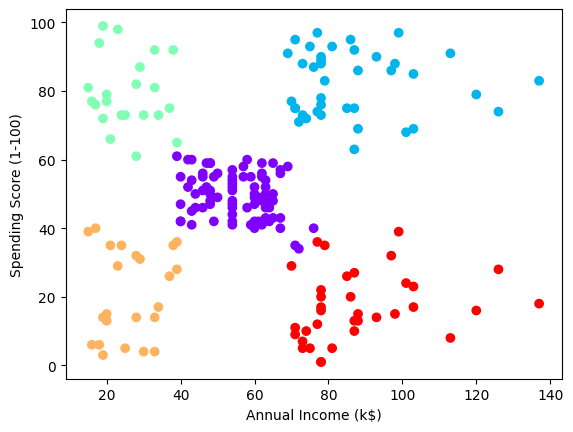

In [ ]:
# After clustering
plt.scatter(df_mall['Annual Income (k$)'],
            df_mall['Spending Score (1-100)'],
            c=df_mall['Cluster'],cmap='rainbow')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

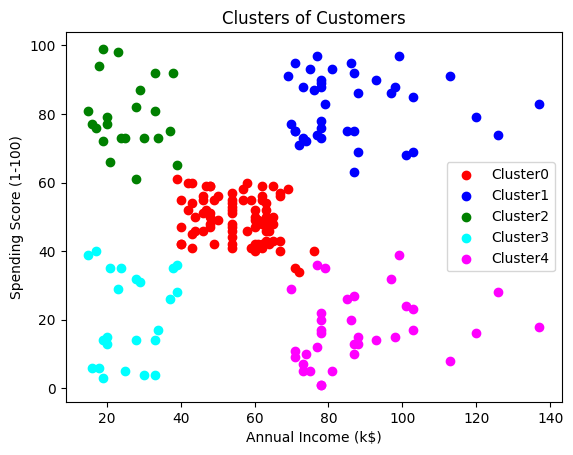

In [ ]:
colors=['red','blue','green','cyan','magenta']
for i in range(5):
  cluster_data = df_mall[df_mall['Cluster']==i]
  plt.scatter(cluster_data['Annual Income (k$)'],
              cluster_data['Spending Score (1-100)'],
             c=colors[i],label =f'Cluster{i}')
  plt.legend()
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clusters of Customers')
plt.show()

In [ ]:
#predict the cluster
def predict_cluster(annual_income,spending_score):
  new_data=[[annual_income,spending_score]]
  cluster = kmeans.predict(new_data)
  return cluster[0]

In [ ]:
predict_cluster=predict_cluster(50,100)
print(predict_cluster)

2


In [ ]:
# libraries for agglomerative clustering
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import fcluster

In [ ]:
ag_cluster = linkage(X,method='ward')  # ward,singlee,centroid
# linkage matrix i.e; agglomerative cluster model

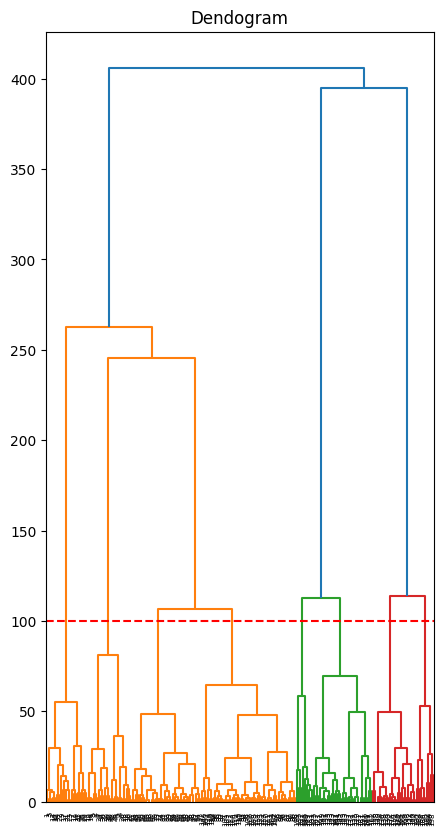

In [ ]:
plt.figure(figsize=(5,10))
dendrogram(ag_cluster)
plt.axhline(y=100,color='red',linestyle='--')
plt.title('Dendogram')
plt.show()

In [ ]:
cluster_labels = fcluster(ag_cluster,t=200,criterion='distance')


df_mall['Cluster_Agglomerative'] = cluster_labels
df_mall.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster,Cluster_Agglomerative
0,1,Male,19,15,39,3,2
1,2,Male,21,15,81,2,1
2,3,Female,20,16,6,3,2
3,4,Female,23,16,77,2,1
4,5,Female,31,17,40,3,2


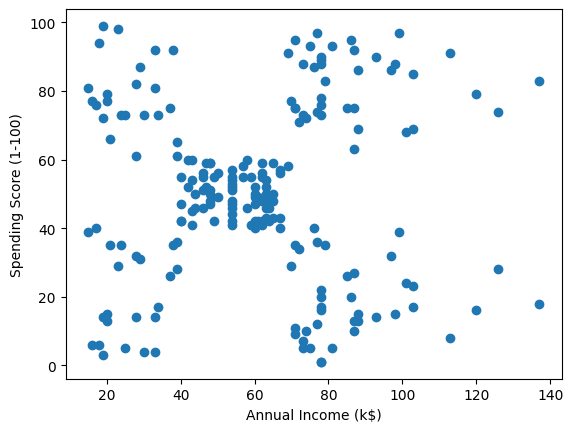

In [ ]:
# Before clustering
plt.scatter(df_mall['Annual Income (k$)'],df_mall['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

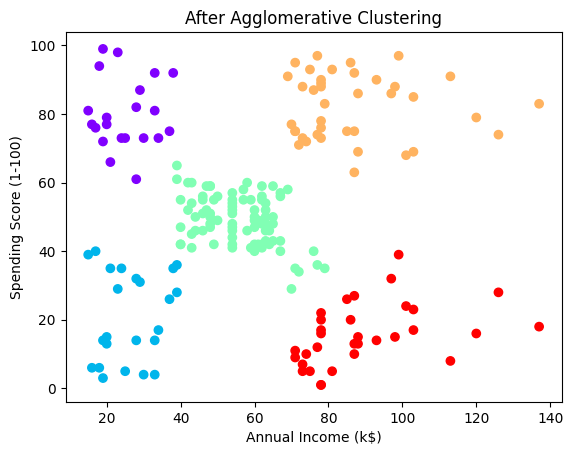

In [ ]:
# After clustering
plt.scatter(df_mall['Annual Income (k$)'],
            df_mall['Spending Score (1-100)'],
            c=df_mall['Cluster_Agglomerative'],cmap='rainbow')
plt.title('After Agglomerative Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

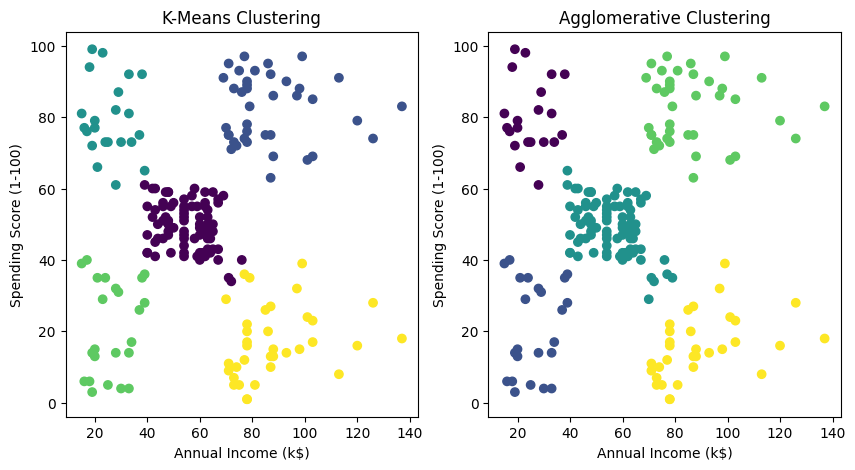

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(df_mall['Annual Income (k$)'],
            df_mall['Spending Score (1-100)'],
            c=df_mall['Cluster'])
plt.title('K-Means Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

plt.subplot(1,2,2)
plt.scatter(df_mall['Annual Income (k$)'],
            df_mall['Spending Score (1-100)'],
            c=df_mall['Cluster_Agglomerative'])
plt.title('Agglomerative Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()
